# TSA Explore Exercises

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.



### Imports

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
from prepare import *

import warnings
warnings.filterwarnings("ignore")

## store item dataset

### Acuire and Prep Data

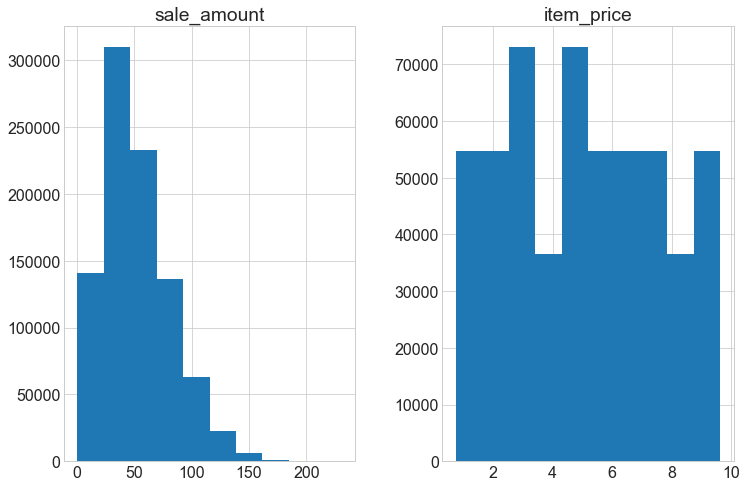

In [3]:
# acquire, clean, and prepare data using clean_items_stores_sales function from prepare.py
items_demand = clean_items_stores_sales()

In [5]:
items_demand.head(1)

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,January,Tuesday,10.92


In [13]:
items_demand.describe

<bound method NDFrame.describe of                            item  sale_amount  sale_id  store  \
sale_date                                                      
2013-01-01 00:00:00+00:00     1         13.0        1      1   
2013-01-01 00:00:00+00:00    12         26.0   211817      7   
2013-01-01 00:00:00+00:00    46         27.0   832657      7   
2013-01-01 00:00:00+00:00    12         54.0   213643      8   
2013-01-01 00:00:00+00:00    12         35.0   215469      9   
...                         ...          ...      ...    ...   
2017-12-31 00:00:00+00:00    34         21.0   619014      9   
2017-12-31 00:00:00+00:00    34         32.0   620840     10   
2017-12-31 00:00:00+00:00    35         55.0   622666      1   
2017-12-31 00:00:00+00:00    33        100.0   598928      8   
2017-12-31 00:00:00+00:00    50         82.0   913000     10   

                                    store_address   store_city  store_id  \
sale_date                                                

### Data Splitting

Will use human-based splitting for the store item demand data. Will use the last year (2017) of data as the test set, 2016 as validate, and the rest as train. 

In [25]:
# split data into train, validate, test

In [31]:
# python warning said to use `frame.loc[string]`

In [32]:
train = items_demand.loc[:'2015'] # includes 2015
validate = items_demand.loc['2016']
test = items_demand.loc['2017']

In [33]:
# confirm slpit

In [34]:
train.shape

(547500, 18)

In [35]:
validate.shape

(183000, 18)

In [36]:
test.shape

(182500, 18)

In [37]:
# plot split data to viz

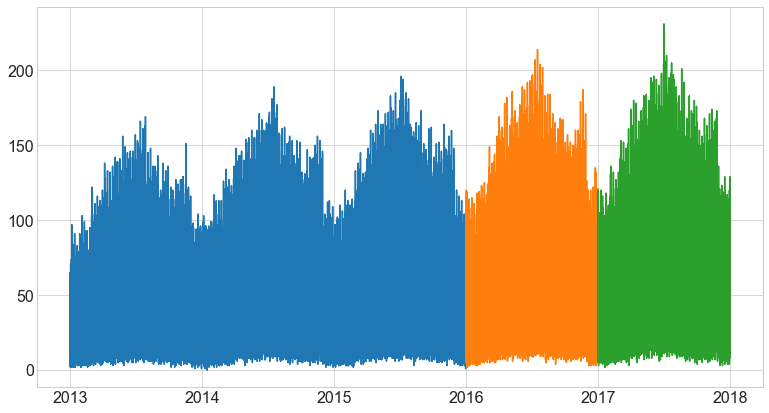

In [38]:
plt.plot(train.index, train.sale_amount)
plt.plot(validate.index, validate.sale_amount)
plt.plot(test.index, test.sale_amount)

In [39]:
# store target var in y
y = train.sale_amount
y.head()


sale_date
2013-01-01 00:00:00+00:00    13.0
2013-01-01 00:00:00+00:00    26.0
2013-01-01 00:00:00+00:00    27.0
2013-01-01 00:00:00+00:00    54.0
2013-01-01 00:00:00+00:00    35.0
Name: sale_amount, dtype: float64

### Visualizing the data

In [40]:
# distribution of target using a hist

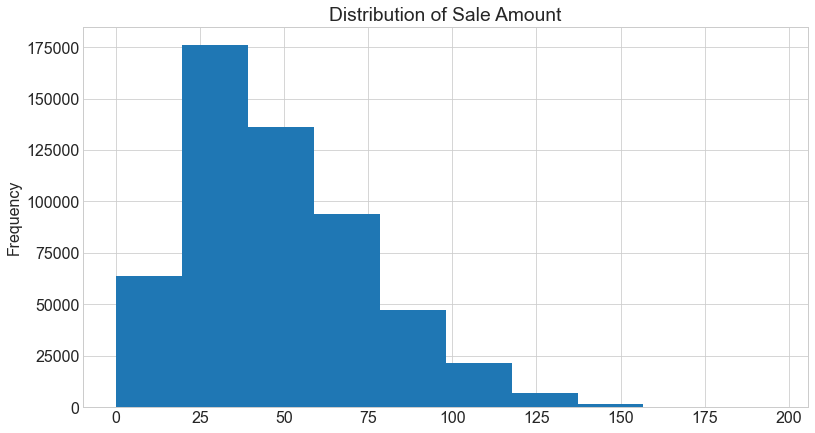

In [84]:
y.plot.hist(title='Distribution of Sale Amount');

#### Looking at the components of the date as they relate to the target var: 

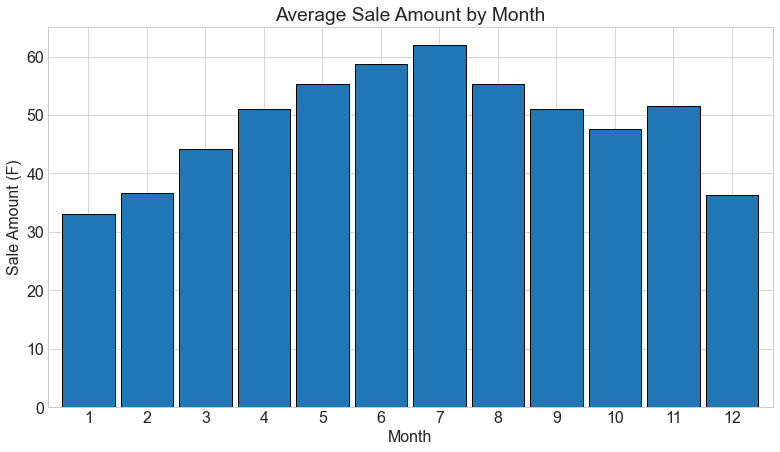

In [82]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sale Amount by Month', xlabel='Month', ylabel='Sale Amount (F)');

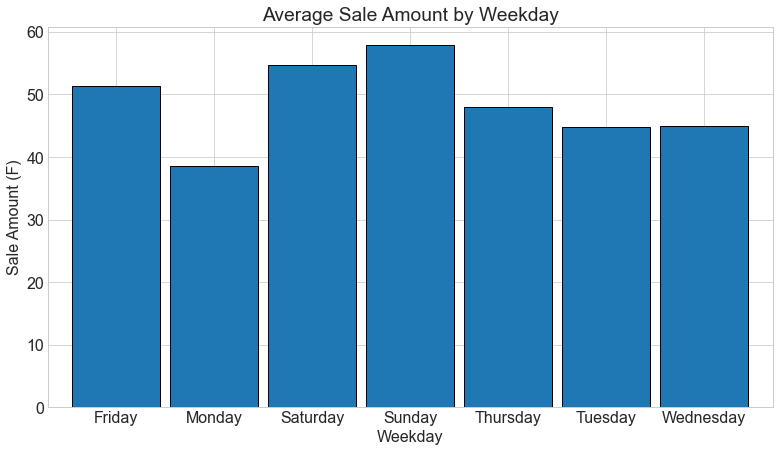

In [81]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sale Amount by Weekday', xlabel='Weekday', ylabel='Sale Amount (F)');

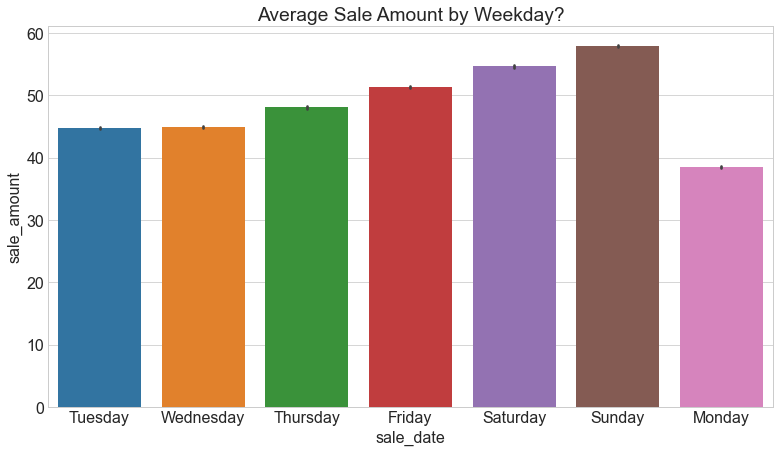

In [80]:
sns.barplot(data=train, y='sale_amount', x=y.index.day_name())
plt.title("Average Sale Amount by Weekday?")
plt.show()

#### Visualizing the target over time:

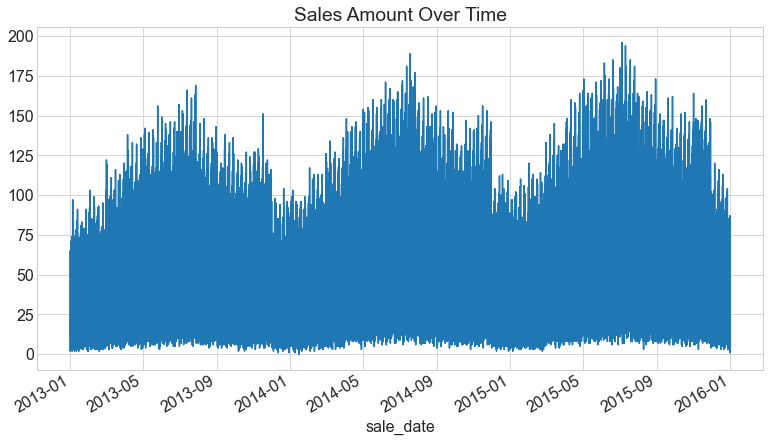

In [79]:
y.plot(title='Sales Amount Over Time');

#### Vizualizing the target over various time periods:

In [67]:
# resample data to viz over various time periods

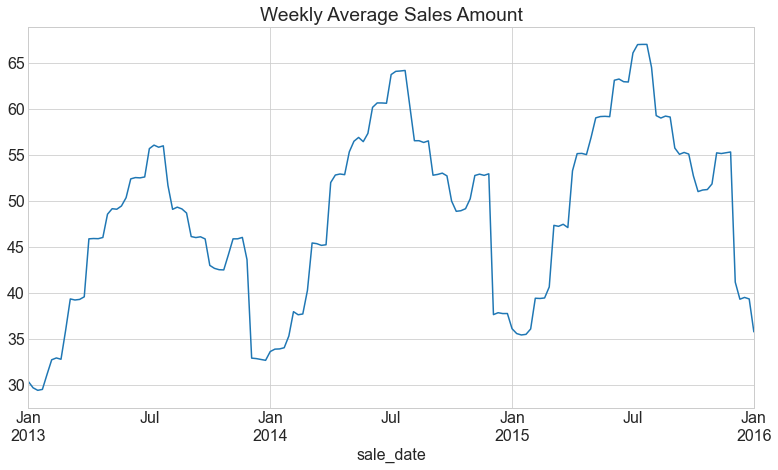

In [77]:
y.resample('1W').mean().plot(title='Weekly Average Sales Amount');

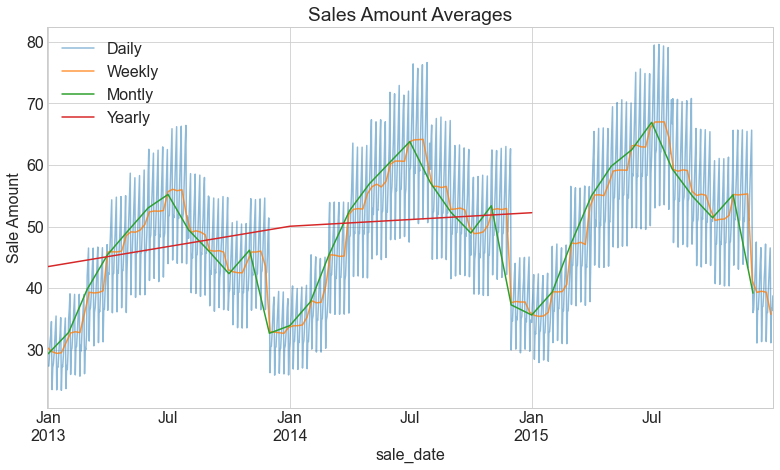

In [127]:
# viz averages by day, week, month, year
# no hourly sales data
y.resample('D').mean().plot(alpha=.5, label='Daily', title='Sales Amount Averages', xlabel='Sale Date', ylabel='Sale Amount')
# y.plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend();

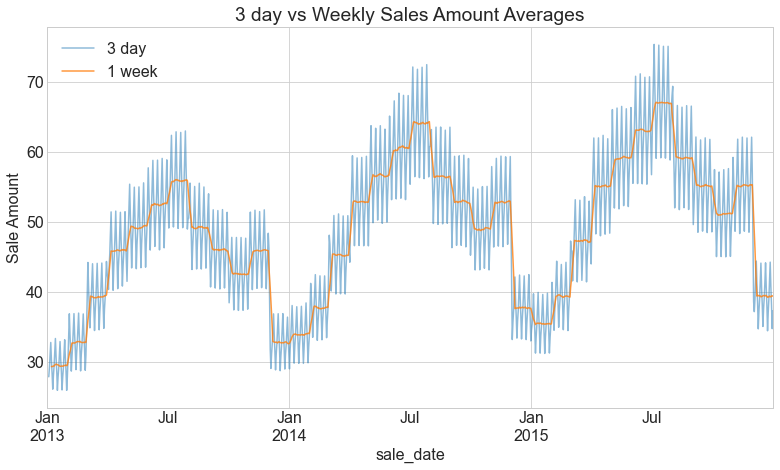

In [98]:
# use .rolling to calc moving averages
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day', title='3 day vs Weekly Sales Amount Averages', xlabel='Sale Date', ylabel='Sale Amount')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend();

#### Visualizing changes over time: 

In [101]:
# use .diff to viz changes over time

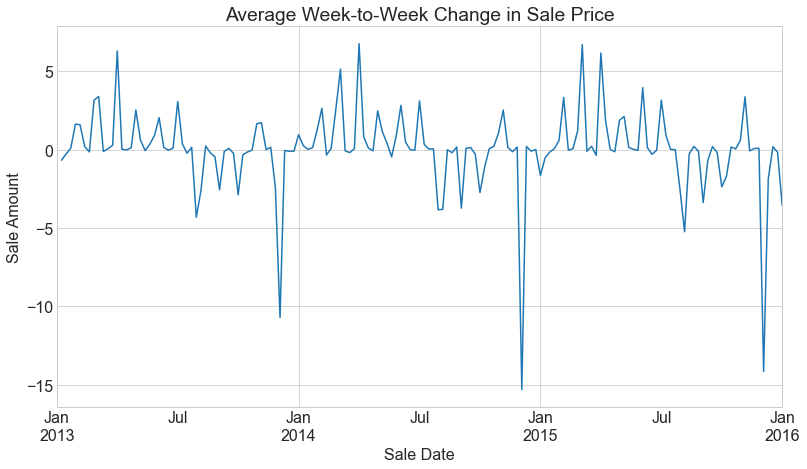

In [102]:
# week-to-week
y.resample('W').mean().diff().plot(title='Average Week-to-Week Change in Sale Price', xlabel='Sale Date', ylabel='Sale Amount');

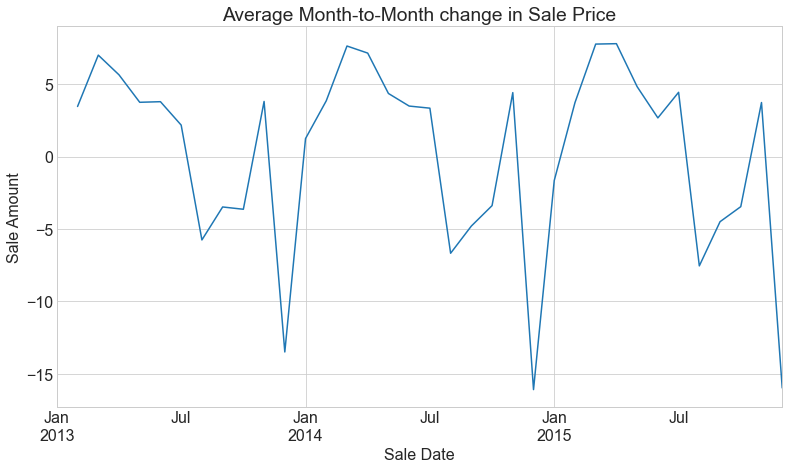

In [105]:
# month-to-month
y.resample('M').mean().diff().plot(title='Average Month-to-Month change in Sale Price', xlabel='Sale Date', ylabel='Sale Amount');

#### Seasonal Plot

A seasonal plot shows the comparison of multiple years together (year-over-year difference).

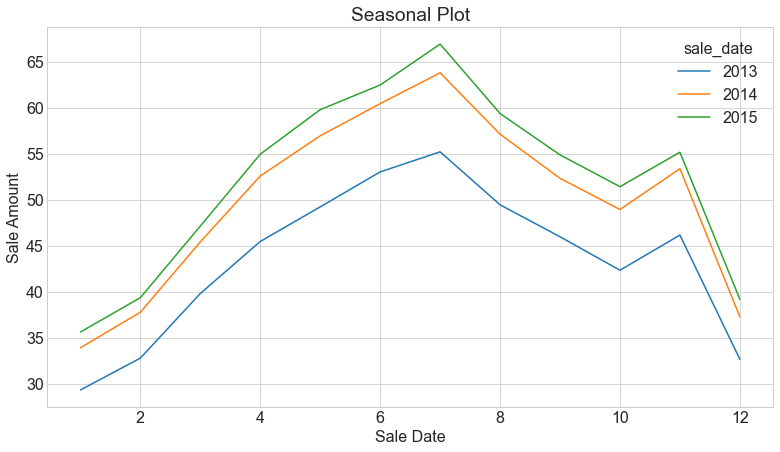

In [107]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot', xlabel='Sale Date', ylabel='Sale Amount');

#### Seasonal Subseries

Show the changes year-over-year but by month. 

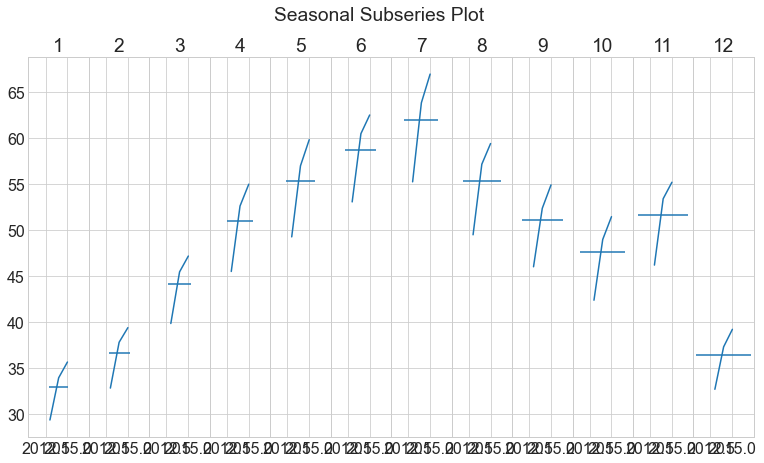

In [108]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### Lag Plot

A log plot is a scatter plot that measures a value aginst the last or next value. 

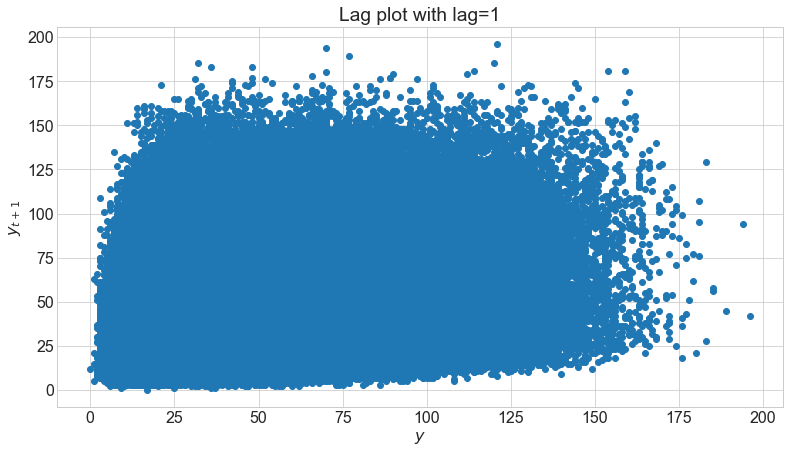

In [110]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1');


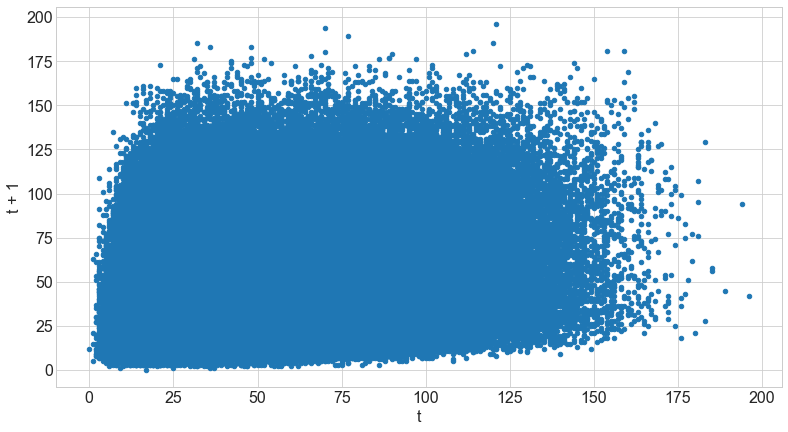

In [113]:
train['y(t + 1)'] = train.sale_amount.shift(-1)
ax = train.plot.scatter(x='sale_amount', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1');

In [114]:
del train['y(t + 1)']

,item,this_week,sale_id,store,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,sales_total,the_next_week
sale_date,,,,,,,,,,,,
2013-01-06 00:00:00+00:00,25.5,30.355667,455590.5,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,154.485156,29.686286
2013-01-13 00:00:00+00:00,25.5,29.686286,455597.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,151.621995,29.414286
2013-01-20 00:00:00+00:00,25.5,29.414286,455604.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,150.679543,29.513714
2013-01-27 00:00:00+00:00,25.5,29.513714,455611.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,149.772519,31.150571
2013-02-03 00:00:00+00:00,25.5,31.150571,455618.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,158.608300,32.733143
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-06 00:00:00+00:00,25.5,41.171143,456654.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,209.904643,39.317143
2015-12-13 00:00:00+00:00,25.5,39.317143,456661.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,200.915133,39.510286
2015-12-20 00:00:00+00:00,25.5,39.510286,456668.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,200.748924,39.342857


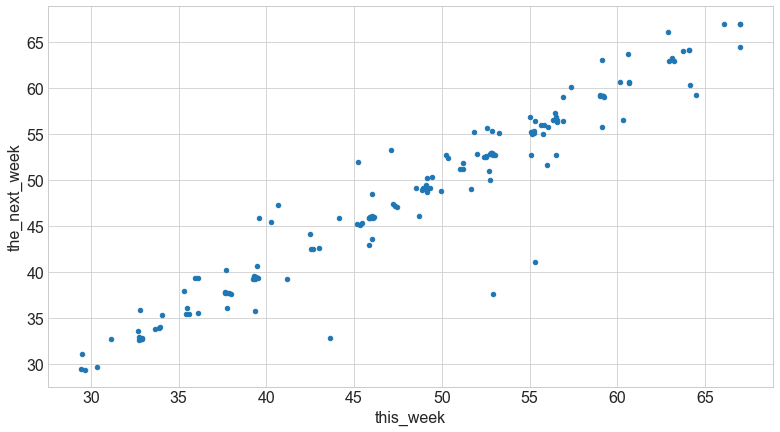

In [121]:
# show next week's sales amounts
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sale_amount.shift(-1)
weekly = weekly.rename(columns={'sale_amount': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week');
weekly

Shows a linear correlation.

,item,this_week,sale_id,store,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,sales_total,12_weeks_out
sale_date,,,,,,,,,,,,
2013-01-06 00:00:00+00:00,25.5,30.355667,455590.5,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,154.485156,39.575143
2013-01-13 00:00:00+00:00,25.5,29.686286,455597.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,151.621995,45.875143
2013-01-20 00:00:00+00:00,25.5,29.414286,455604.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,150.679543,45.909429
2013-01-27 00:00:00+00:00,25.5,29.513714,455611.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,149.772519,45.892286
2013-02-03 00:00:00+00:00,25.5,31.150571,455618.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,158.608300,46.023143
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-06 00:00:00+00:00,25.5,41.171143,456654.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,209.904643,NaN
2015-12-13 00:00:00+00:00,25.5,39.317143,456661.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,200.915133,NaN
2015-12-20 00:00:00+00:00,25.5,39.510286,456668.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,200.748924,NaN


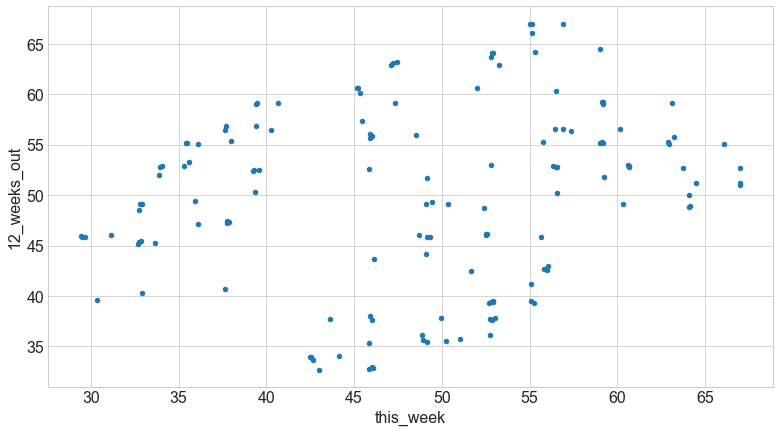

In [122]:
# with a longer lag time

weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sale_amount.shift(-12)
weekly = weekly.rename(columns={'sale_amount': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out');
weekly

Can't see a pattern anymore.

,item,this_week,sale_id,store,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,sales_total,half_a_year_later
sale_date,,,,,,,,,,,,
2013-01-06 00:00:00+00:00,25.5,30.355667,455590.5,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,154.485156,55.677429
2013-01-13 00:00:00+00:00,25.5,29.686286,455597.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,151.621995,56.060857
2013-01-20 00:00:00+00:00,25.5,29.414286,455604.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,150.679543,55.832000
2013-01-27 00:00:00+00:00,25.5,29.513714,455611.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,149.772519,55.983429
2013-02-03 00:00:00+00:00,25.5,31.150571,455618.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,158.608300,51.674857
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-06 00:00:00+00:00,25.5,41.171143,456654.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,209.904643,NaN
2015-12-13 00:00:00+00:00,25.5,39.317143,456661.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,200.915133,NaN
2015-12-20 00:00:00+00:00,25.5,39.510286,456668.0,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,200.748924,NaN


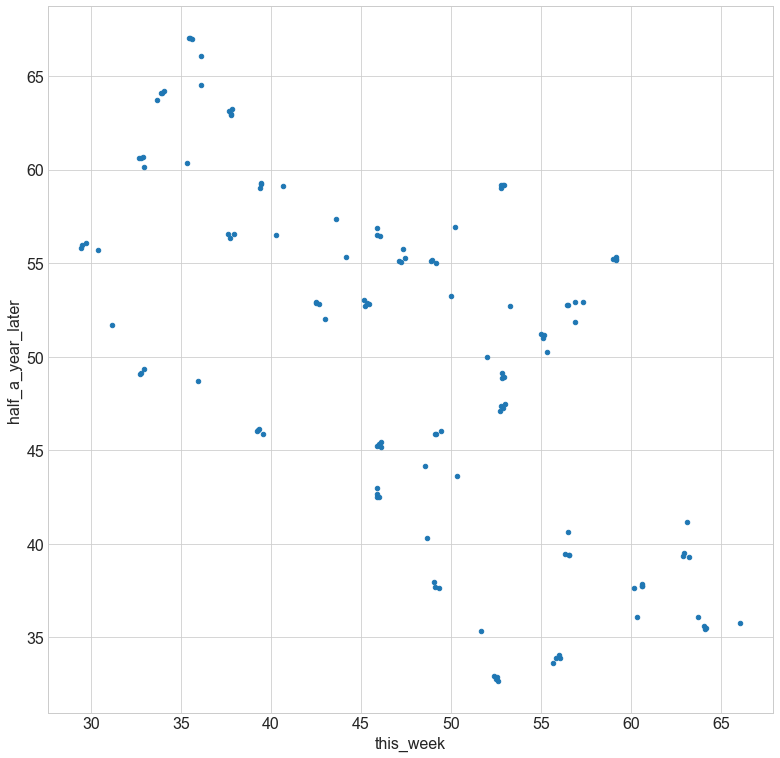

In [124]:
# 26 week lag
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sale_amount.shift(-26)
weekly = weekly.rename(columns={'sale_amount': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13));
weekly


#### Autocorrelation 

a measure of the linear relationship between lagged values 


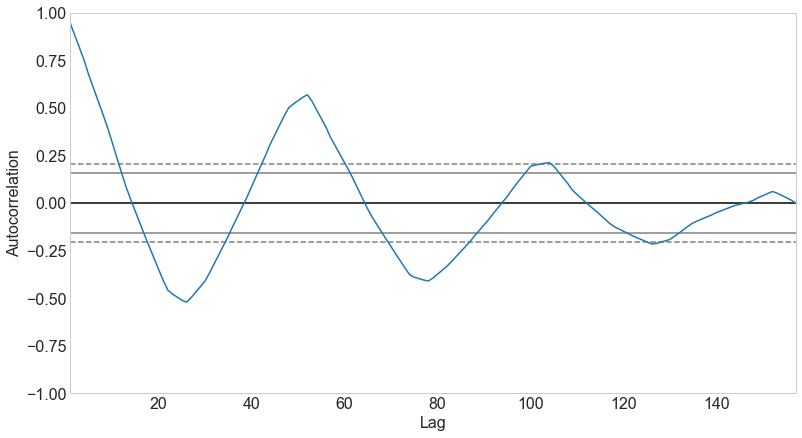

In [137]:
pd.plotting.autocorrelation_plot(train.sale_amount.resample('W').mean());

peaks = frequency of the seasonality

valleys = where corr is the most neg

#### Seasonal Decomposition

Breaks time series into seasonal repeated cycle, long term trend, and random noise. 

In [131]:
# use seasonal_decompose from statsmodels library

In [132]:
y = train.sale_amount.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,30.355667,NaN,-13.948713,NaN
2013-01-13 00:00:00+00:00,29.686286,NaN,-14.184235,NaN
2013-01-20 00:00:00+00:00,29.414286,NaN,-14.354328,NaN
2013-01-27 00:00:00+00:00,29.513714,NaN,-14.363316,NaN
2013-02-03 00:00:00+00:00,31.150571,NaN,-13.547961,NaN


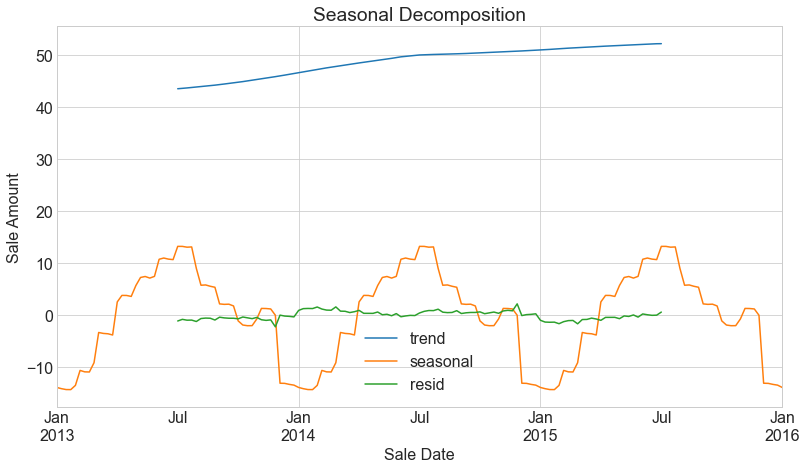

In [139]:
decomposition.iloc[:, 1:].plot(title='Seasonal Decomposition', xlabel='Sale Date', ylabel='Sale Amount');

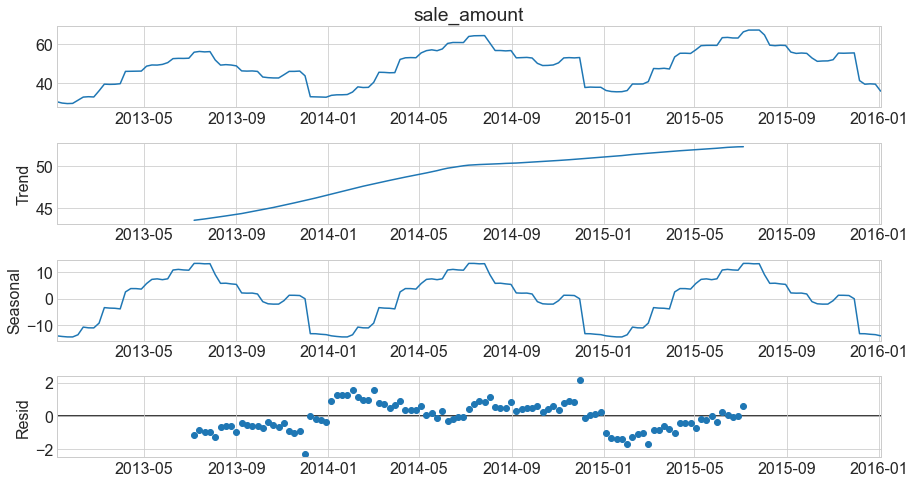

In [140]:
# plot the value that is returned
result.plot()
None

#### Categories Over Time

In [142]:
train = train.resample('D').mean()
# create a cat feature by binning sale_amount
train['sale_amount_bin'] = pd.qcut(train.sale_amount, 3, labels=['low', 'moderate', 'high'])
train.groupby('sale_amount_bin').mean()

,item,sale_amount,sale_id,store,store_id,store_zipcode,item_id,item_price,item_upc12,item_upc14,sales_total
sale_amount_bin,,,,,,,,,,,
low,25.5,35.907907,456014.320548,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,182.923520
moderate,25.5,48.382926,456130.531507,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,246.565909
high,25.5,61.537178,456260.147945,5.5,5.5,78224.8,22.166667,5.004667,2.235129e+11,2.235129e+11,313.470475


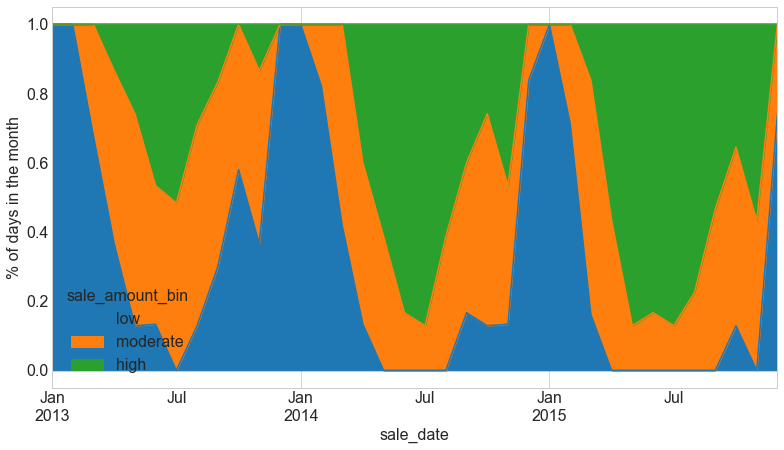

In [144]:
# distribution of sales_amount_bin over time
(train.groupby('sale_amount_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month');

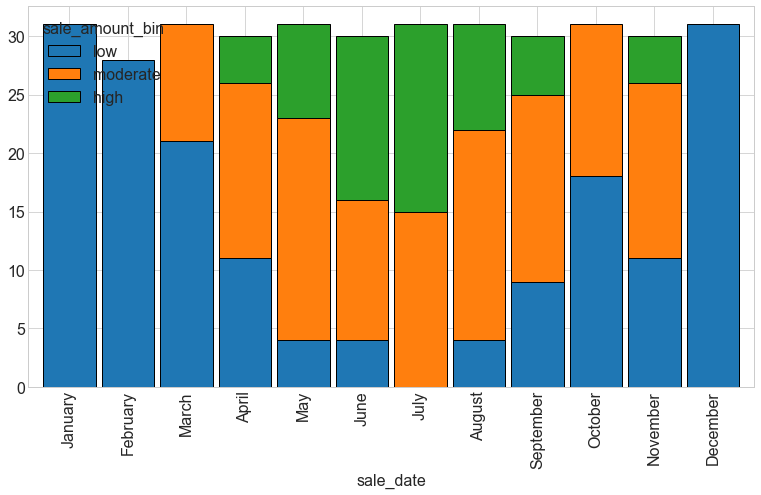

In [148]:
ax = (train['2013']
 .groupby('sale_amount_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

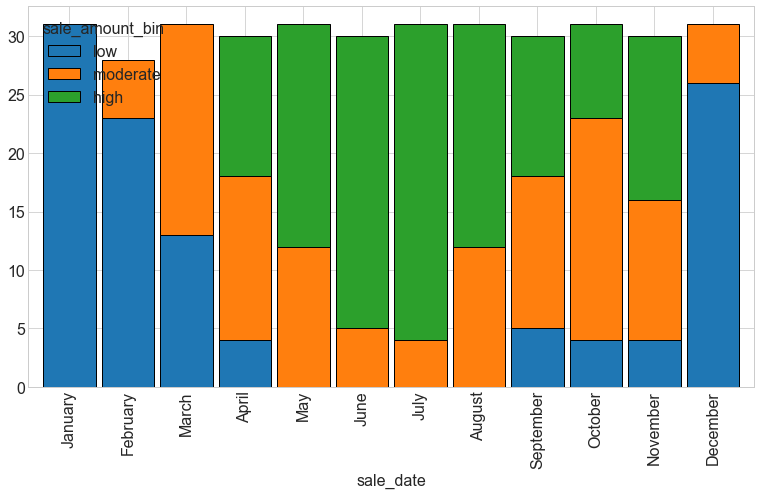

In [149]:
ax = (train['2014']
 .groupby('sale_amount_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

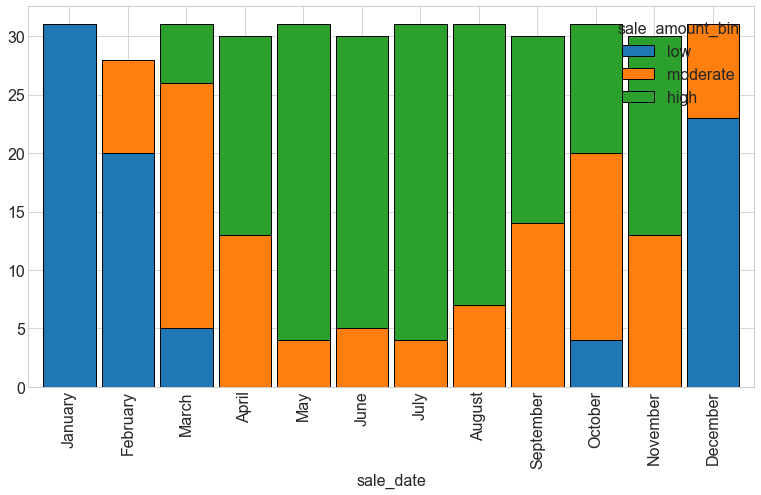

In [150]:
ax = (train['2015']
 .groupby('sale_amount_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

#### strftime

To keep month names (in this case) in order, format them so that a number is prepended to them. This way they won't be sorted alphabetically and will stay in their logical order. 

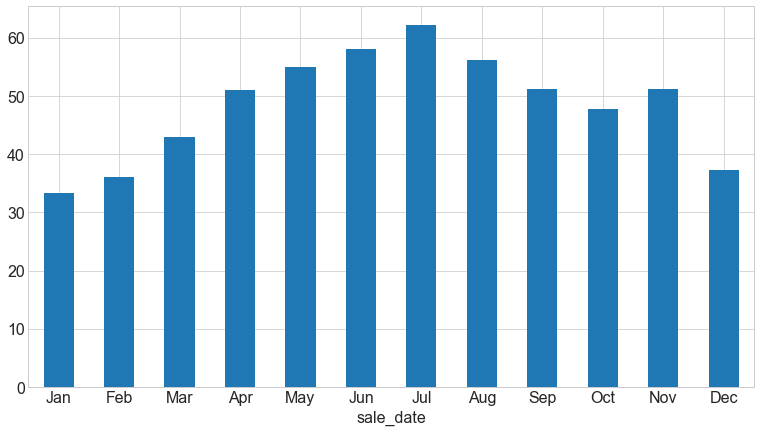

In [151]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

#### Custom Formatting 

Use plt.plot or ax.plot and pass  datetime index as your x values for custom formatting. 

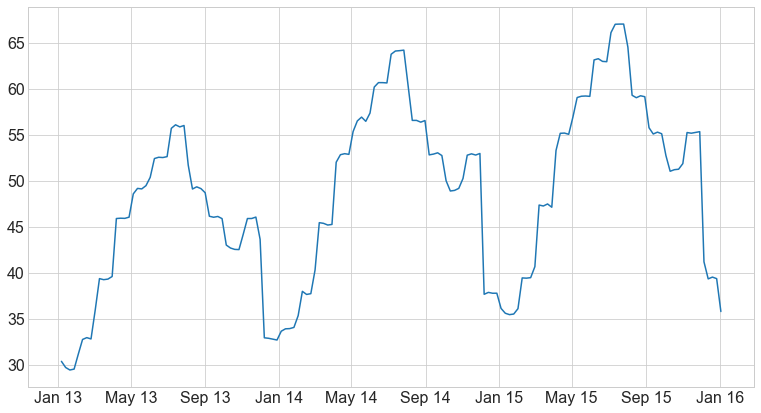

In [152]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

## opsd dataset